[**Demo %s**](#demo-implicit-stiff)

The following simple ODE uncovers a surprise.

In [2]:
ivp = ode;
ivp.ODEFcn = @(t, u, p) u^2 - u^3;
ivp.InitialValue = 0.005;

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

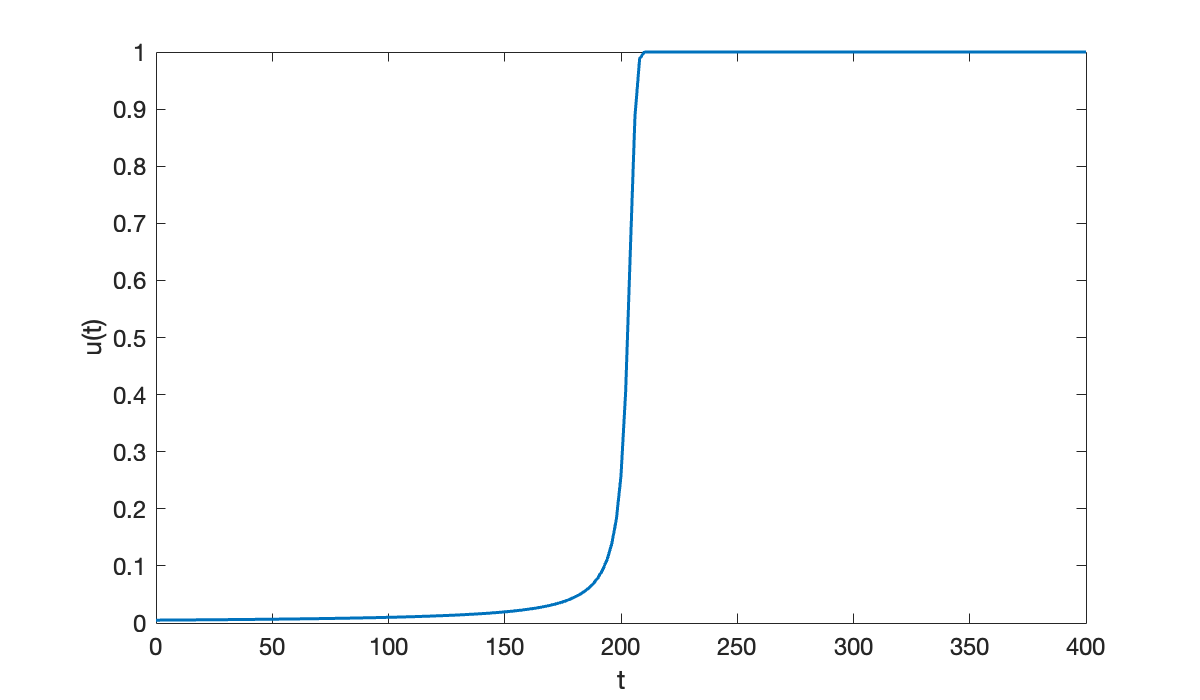

In [3]:
[tI, uI] = am2(ivp, 0, 400, 200);
clf
plot(tI, uI)
xlabel("t");  ylabel(("u(t)"));

Now we repeat the process using the explicit AB4 method.

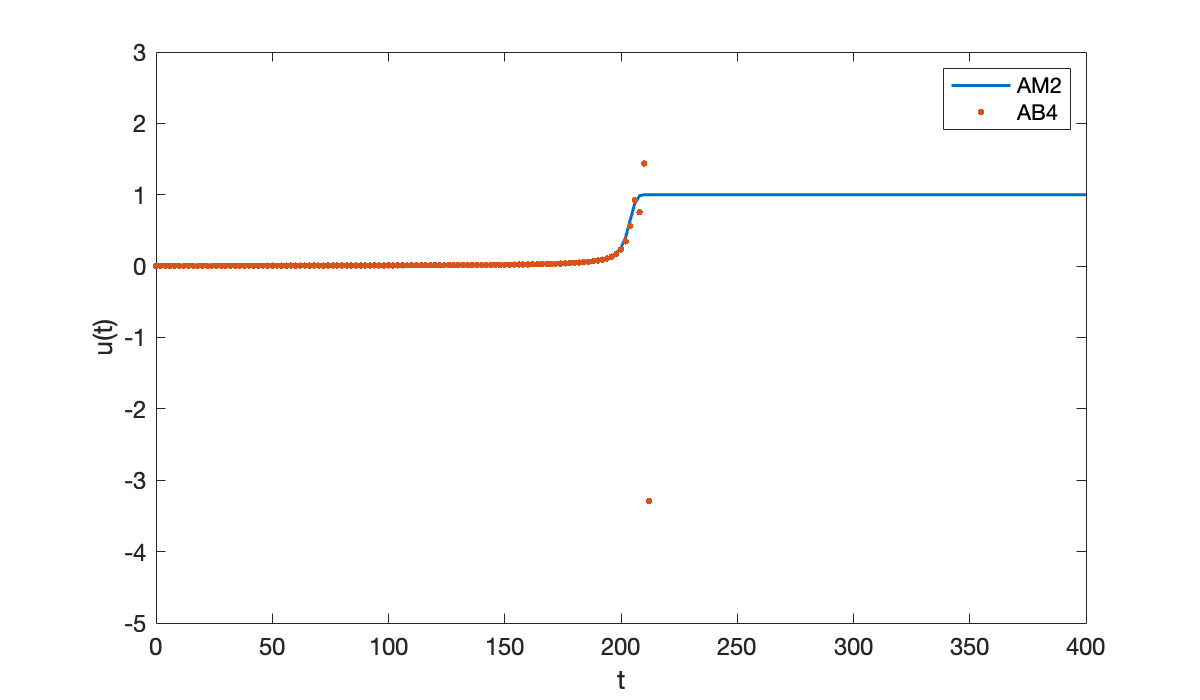

In [4]:
[tE, uE] = ab4(ivp, 0, 400, 200);
hold on
plot(tE, uE, '.', 'markersize', 8)
ylim([-5, 3])
legend("AM2", "AB4");

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [5]:
format short e
uE(105:111)

ans = 1×7 double
1.0e+00 *

   7.5539e-01   1.4373e+00  -3.2890e+00   2.1418e+02  -4.4821e+07   4.1269e+23  -3.2214e+71

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

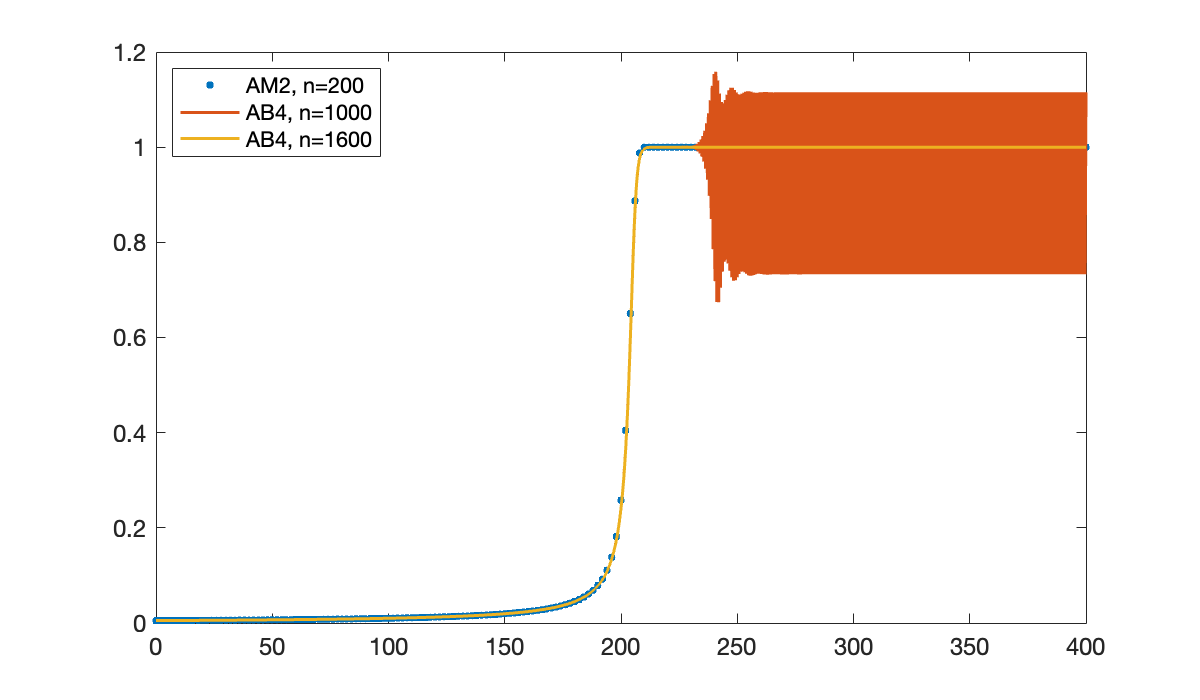

In [6]:
clf,  plot(tI, uI, '.', 'markersize', 10)
hold on
[tE, uE] = ab4(ivp, 0, 400, 1000);
plot(tE, uE)
[tE, uE] = ab4(ivp, 0, 400, 1600);
plot(tE, uE)
legend("AM2, n=200", "AB4, n=1000", "AB4, n=1600", location="northwest");

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!